# transactionsデータ
- 前処理・可視化

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

comma_formatter = mpl.ticker.FuncFormatter(lambda x, _: u'{:,.0f}'.format(x))
sns.set(style='darkgrid', context='talk')
mpl.rcParams['font.family'] = 'Meiryo'
% matplotlib inline

In [2]:
data_dir = '../../data'
fig_dir = '../figure'
output_dir = '../output'

# データ読み込み

In [3]:
fname = os.path.join(data_dir, 'transactions.csv.gz')
df_transactions_raw = pd.read_csv(fname, dtype=np.object_, parse_dates=['transaction_date', 'membership_expire_date'])

In [4]:
print('count: {:,}'.format(len(df_transactions_raw)))

count: 3,318,230


In [5]:
# 概要
df_transactions_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318230 entries, 0 to 3318229
Data columns (total 9 columns):
msno                      object
payment_method_id         object
payment_plan_days         object
plan_list_price           object
actual_amount_paid        object
is_auto_renew             object
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                 object
dtypes: datetime64[ns](2), object(7)
memory usage: 227.8+ MB


In [6]:
# データの中身を確認
df_transactions_raw.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++0t0Uy2D3r1pRVxg28G3r3l5PfhFlCPMGElwHqbYL8=,35,7,0,0,0,2015-06-14,2015-06-15,0
1,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,38,30,149,149,0,2015-09-29,2015-10-29,0
2,++1TnybRWMiv1YN2UW5hyicLSm3AhDaU/89lFkZC//8=,41,30,149,0,1,2015-11-14,2015-12-14,0
3,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,38,30,149,149,0,2015-10-31,2015-11-30,0
4,++1TnybRWMiv1YN2UW5hyicLSm3AhDaU/89lFkZC//8=,41,30,149,0,1,2015-12-13,2015-12-13,1


## 統計量

In [7]:
desc_raw = df_transactions_raw.describe(include='all')
desc_raw

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,3318230,3318230,3318230,3318230,3318230,3318230,3318230,3318230,3318230
unique,403793,40,34,46,48,2,790,821,2
top,+PhENZHX27M62GNCb9LuaFZ1JdzPQyt1WCDiPwOCg10=,41,30,149,149,1,2016-10-31 00:00:00,2015-06-15 00:00:00,0
freq,41,1608835,2884922,1953201,1957591,2802224,35139,33025,3199984
first,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 00:00:00,2017-03-31 00:00:00,NaN


In [8]:
# 欠損値
df_transactions_raw.isnull().any()

msno                      False
payment_method_id         False
payment_plan_days         False
plan_list_price           False
actual_amount_paid        False
is_auto_renew             False
transaction_date          False
membership_expire_date    False
is_cancel                 False
dtype: bool

欠損値なし

# 集計・可視化

## payment_method_id

In [9]:
payment_method_dist = df_transactions_raw.payment_method_id.value_counts(normalize=1)
payment_method_dist.head(10) # 一部

41    0.484847
40    0.113085
38    0.083364
39    0.079972
37    0.055577
34    0.040528
36    0.037892
35    0.027505
33    0.020800
31    0.014124
Name: payment_method_id, dtype: float64

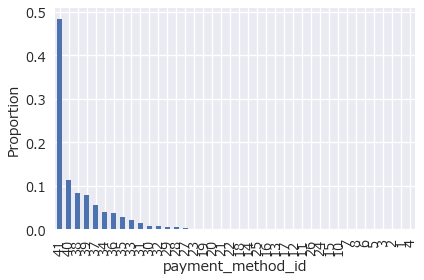

In [10]:
payment_method_dist.plot.bar()
plt.xlabel('payment_method_id')
plt.ylabel('Proportion')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'batplot_payment_method_id.png'), dpi=200)
# - `payment_method_id=41` が半数
# - （コードの具体的意味は不明）

## payment_plan_days

In [11]:
plan_days_dist = df_transactions_raw.payment_plan_days.value_counts(normalize=1)
plan_days_dist.head() # 一部

30     0.869416
0      0.042661
31     0.040343
7      0.028866
195    0.005871
Name: payment_plan_days, dtype: float64

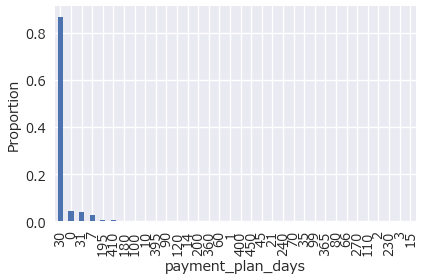

In [12]:
plan_days_dist.plot.bar()
plt.xlabel('payment_plan_days')
plt.ylabel('Proportion')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_payment_plan_days.png'), dpi=200)
# - `payment_plan_days=30` が9割弱
# - `payment_plan_days=0` も4%いる（無料プラン or お試し??）

## plan_list_price

In [13]:
plan_price_dist = df_transactions_raw.plan_list_price.value_counts(normalize=1)
plan_price_dist.head() # 一部

149    0.588627
99     0.233223
0      0.073199
129    0.034000
180    0.031910
Name: plan_list_price, dtype: float64

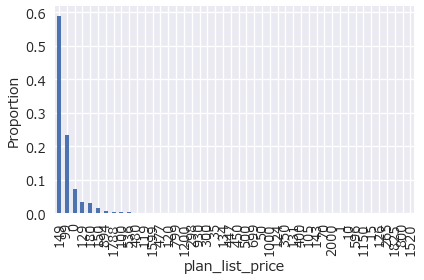

In [14]:
# fig, ax = plt.subplots(figsize=(10, 4))
plan_price_dist.plot.bar()
plt.xlabel('plan_list_price')
plt.ylabel('Proportion')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_plan_list_price.png'), dpi=200)
# - `plan_list_price=149` が6割弱
# - `plan_list_price= 99` が2割強

## actual_amount_paid

In [15]:
actual_amount_paid_dist = df_transactions_raw.actual_amount_paid.value_counts(normalize=1)
actual_amount_paid_dist.head() # 一部

149    0.589950
99     0.233314
0      0.059778
129    0.034958
180    0.031776
Name: actual_amount_paid, dtype: float64

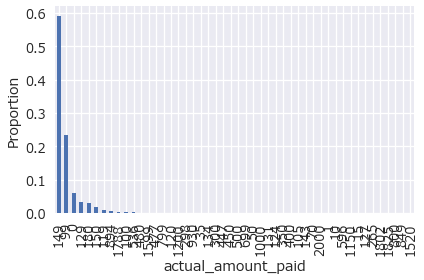

In [16]:
actual_amount_paid_dist.plot.bar()
plt.xlabel('actual_amount_paid')
plt.ylabel('Proportion')
# plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_actual_amont_paid.png'), dpi=200)
# - `149, 99` で8割を占める

### 支払い金額比較

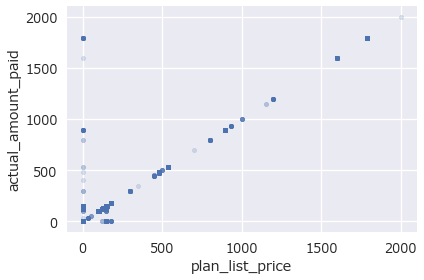

In [17]:
# プランの金額と実際の支払額
# （処理負荷軽減のため、1万件サンプリング）
cols = ['plan_list_price', 'actual_amount_paid']

np.random.seed(0)
tmp = df_transactions_raw[cols].astype('float').sample(n=100000)
tmp.plot.scatter(cols[0], cols[1], alpha=0.2)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'scatter_plan-list-price_vs_actual_amount_paid.png'), dpi=200)

# - 概ね一致しているが一部異なっている（割引などか??）

In [18]:
df_transactions_raw[df_transactions_raw.plan_list_price.astype('int') 
                    >  df_transactions_raw.actual_amount_paid.astype('int')].groupby('is_auto_renew').size()
# - actual_amount_paid　< plan_list_priceのほとんどが自動更新(auto_renew=1)のもの

is_auto_renew
0         3
1    125978
dtype: int64

## is_auto_renew

In [19]:
is_auto_renew_dist = df_transactions_raw.is_auto_renew.value_counts(normalize=1)
is_auto_renew_dist

1    0.844494
0    0.155506
Name: is_auto_renew, dtype: float64

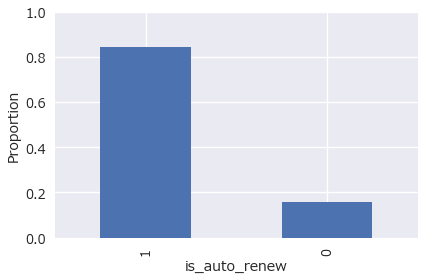

In [20]:
is_auto_renew_dist.plot.bar()
plt.xlabel('is_auto_renew')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_is_auto_renew.png'), dpi=200)
# - `1` が85%（自動更新する）

## is_cancel

In [21]:
is_cancel_dist = df_transactions_raw.is_cancel.value_counts(normalize=1)
is_cancel_dist

0    0.964365
1    0.035635
Name: is_cancel, dtype: float64

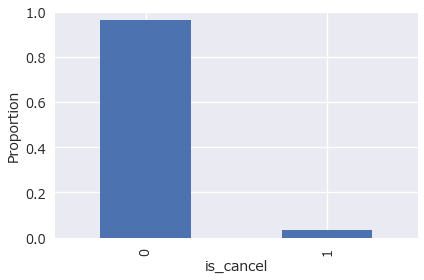

In [22]:
is_cancel_dist.plot.bar()
plt.xlabel('is_cancel')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_is_cancel.png'), dpi=200)
# - `0` が95%超

## transaction_date

In [23]:
transaction_date_dist = df_transactions_raw.transaction_date.value_counts()
transaction_date_dist.head() # 一部

2016-10-31    35139
2016-08-31    35060
2016-09-30    34375
2016-07-31    34115
2016-11-30    33812
Name: transaction_date, dtype: int64

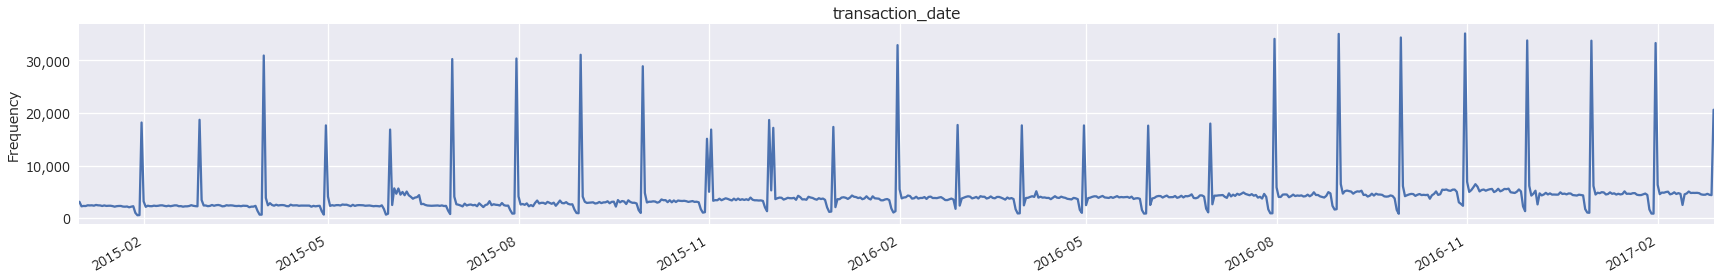

In [24]:
fig, ax = plt.subplots(figsize=(24, 4))
transaction_date_dist.plot(ax=ax) 
ax.set_title('transaction_date')
ax.set_ylabel('Frequency')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'plot_transaction_date.png'), dpi=200)
# - 月末にスパイク

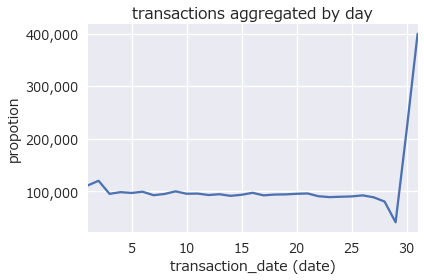

In [25]:
agg = df_transactions_raw.groupby(df_transactions_raw.transaction_date.dt.day).size()
# display(agg)

ax = agg.plot()
ax.set_xlabel('transaction_date (date)')
ax.set_ylabel('propotion')
ax.set_title('transactions aggregated by day')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
# - なぜか月末のレコード数が多い

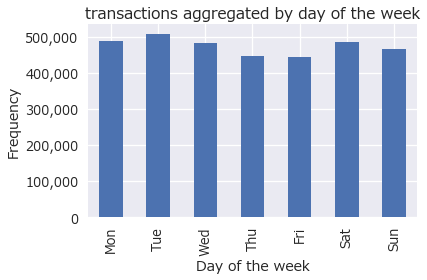

In [26]:
# 曜日別transactions
agg_transaction_date_by_dow = df_transactions_raw.groupby(df_transactions_raw.transaction_date.dt.dayofweek).size()
agg_transaction_date_by_dow.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = agg_transaction_date_by_dow.plot.bar()
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')
ax.set_title('transactions aggregated by day of the week')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_transaction_date_by_dow.png'), dpi=200)
# - 火曜日が一番多い

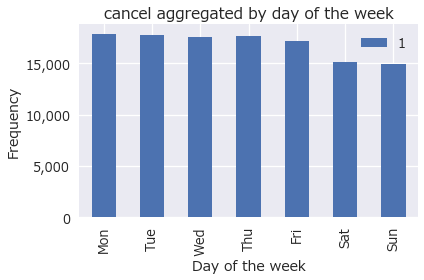

In [27]:
# 曜日別is_cancel=1
is_cancel_by_dow = df_transactions_raw.groupby(df_transactions_raw.transaction_date.dt.dayofweek).is_cancel.value_counts().unstack()['1']
is_cancel_by_dow.index =  ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = is_cancel_by_dow.plot.bar()
ax.set_title('cancel aggregated by day of the week')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'barplot_cancel_by_dow.png'), dpi=200)
# - 土日はやや少ない

## membership_expire_date

In [28]:
expire_date_dist = df_transactions_raw.membership_expire_date.value_counts()
expire_date_dist.head() # 一部

2015-06-15    33025
2017-02-28    22253
2016-10-31    22174
2016-11-30    22000
2016-08-31    21706
Name: membership_expire_date, dtype: int64

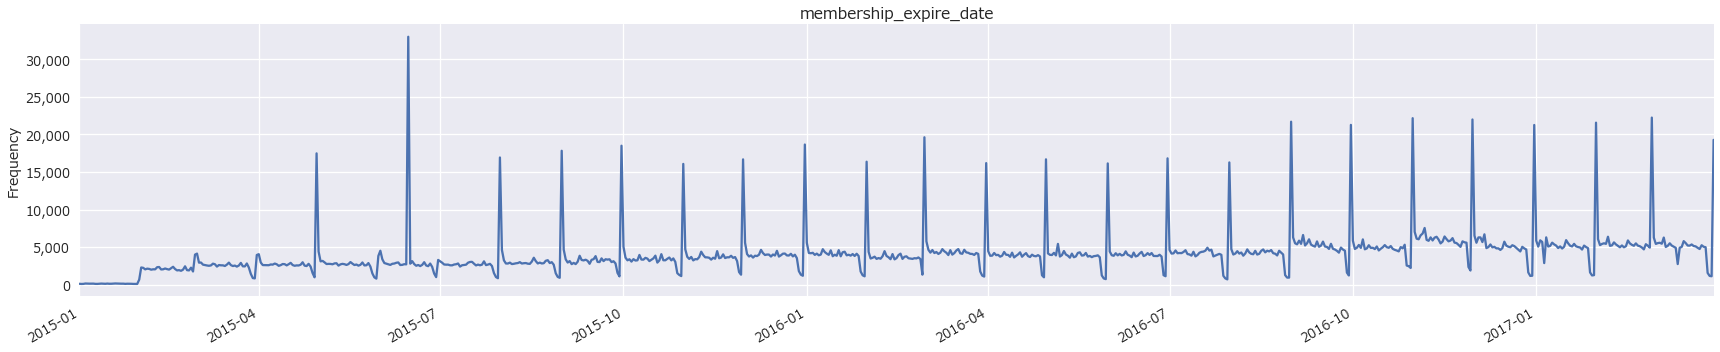

In [29]:
fig, ax = plt.subplots(figsize=(24, 5))
expire_date_dist.plot()
ax.set_title('membership_expire_date')
ax.set_ylabel('Frequency')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'plot_membership_expire_date.png'), dpi=200)
# 月末にスパイク

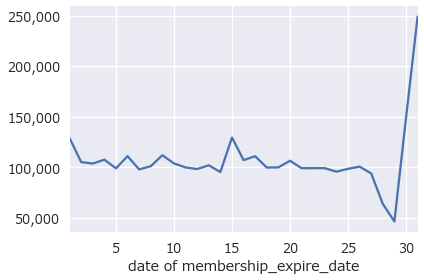

In [30]:
ax = df_transactions_raw.membership_expire_date.dt.day.value_counts().sort_index().plot()
ax.yaxis.set_major_formatter(comma_formatter)
ax.set_xlabel('date of membership_expire_date')
plt.tight_layout()
# 月末が多い

## transaction/expire

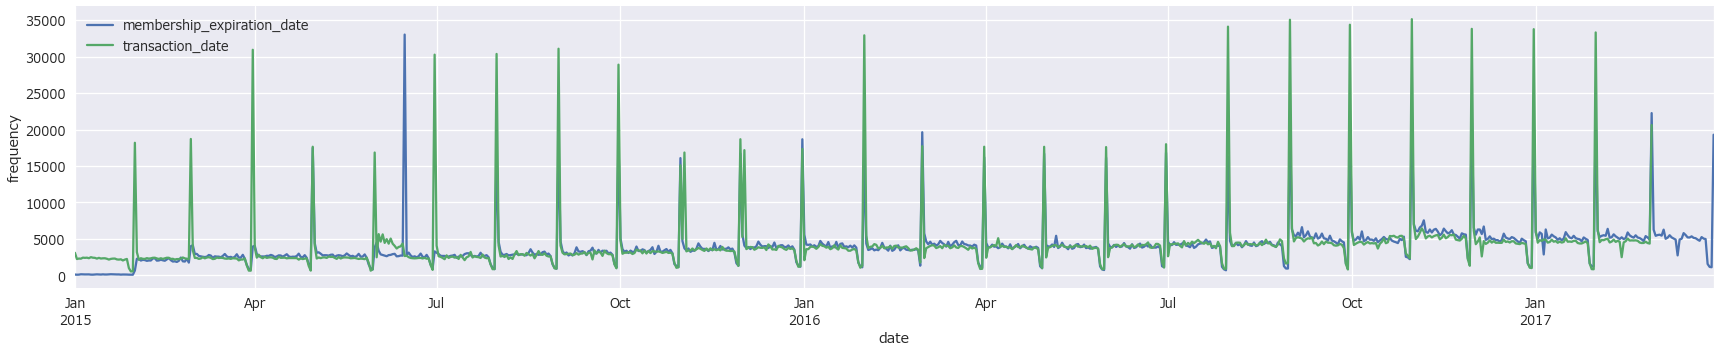

In [31]:
# 月別推移
agg1 = df_transactions_raw.transaction_date.value_counts()
agg2 = df_transactions_raw.membership_expire_date.value_counts()

fig, ax = plt.subplots(figsize=(24, 5))
pd.DataFrame(dict(transaction_date = agg1, membership_expiration_date = agg2)).plot(ax=ax)
# plt.xlim(xmin=pd.to_datetime('2015-01-01')) # 2015年以降に絞る
plt.xlabel('date')
plt.ylabel('frequency')
plt.tight_layout()
# - ほぼ同じ傾向

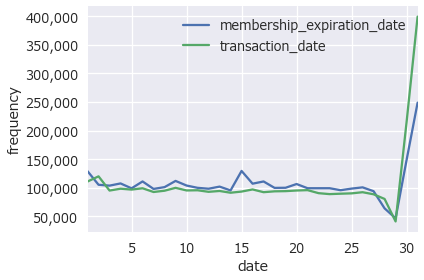

In [32]:
# 日別集計値
agg1 = df_transactions_raw.groupby(df_transactions_raw.transaction_date.dt.day).size()
agg2 = df_transactions_raw.groupby(df_transactions_raw.membership_expire_date.dt.day).size()

ax = pd.DataFrame(dict(transaction_date = agg1, membership_expiration_date = agg2)).plot()
ax.set_xlabel('date')
ax.set_ylabel('frequency')
ax.yaxis.set_major_formatter(comma_formatter)
plt.tight_layout()
# - こちらも同じような傾向

# 前処理

In [33]:
# 異常値除去：
# transaction_date より membership_expire_date が古いデータを除く
otl_msno = list(df_transactions_raw.query('transaction_date > membership_expire_date').msno.unique())
df_transactions = df_transactions_raw[~df_transactions_raw.msno.isin(otl_msno)].copy()

In [34]:
desc_2 = df_transactions.describe(include='all')
desc_2

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,3105678,3105678,3105678,3105678,3105678,3105678,3105678,3105678,3105678
unique,384773,39,34,46,48,2,790,821,2
top,+PhENZHX27M62GNCb9LuaFZ1JdzPQyt1WCDiPwOCg10=,41,30,149,149,1,2016-10-31 00:00:00,2015-06-15 00:00:00,0
freq,41,1574553,2712528,1789973,1790695,2608605,34509,32073,3010781
first,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 00:00:00,2017-03-31 00:00:00,NaN


# 目的変数用調査

## 関連するカラムの集計

In [35]:
# 元データ
df_transactions_raw.groupby(['is_auto_renew', 'is_cancel']).size()

is_auto_renew  is_cancel
0              0             516002
               1                  4
1              0            2683982
               1             118242
dtype: int64

In [36]:
# is_auto_renewとis_cancelのレコード
df_transactions.groupby(['is_auto_renew', 'is_cancel']).size()

is_auto_renew  is_cancel
0              0             497073
1              0            2513708
               1              94897
dtype: int64

In [37]:
# クレンジング済みデータ
df_transactions.groupby(['is_auto_renew', 'is_cancel']).size() / len(df_transactions)

is_auto_renew  is_cancel
0              0            0.160053
1              0            0.809391
               1            0.030556
dtype: float64

## 日数差

In [38]:
# transaction_dateの昇順でソート
df_transactions.sort_values(['msno', 'transaction_date'], inplace=True)

# １レコード先のtransaction_dateを取得
df_transactions['transaction_date_p1'] = df_transactions.groupby('msno').transaction_date.shift(-1) 

In [39]:
# 失効日から次のトランザクションまでの日付差
# （1レコード先の transaction_date_p1 と membership_expire_date の日付差分）
df_transactions['diff_'] = (
    df_transactions.transaction_date_p1 - df_transactions.membership_expire_date
).astype('timedelta64[D]')

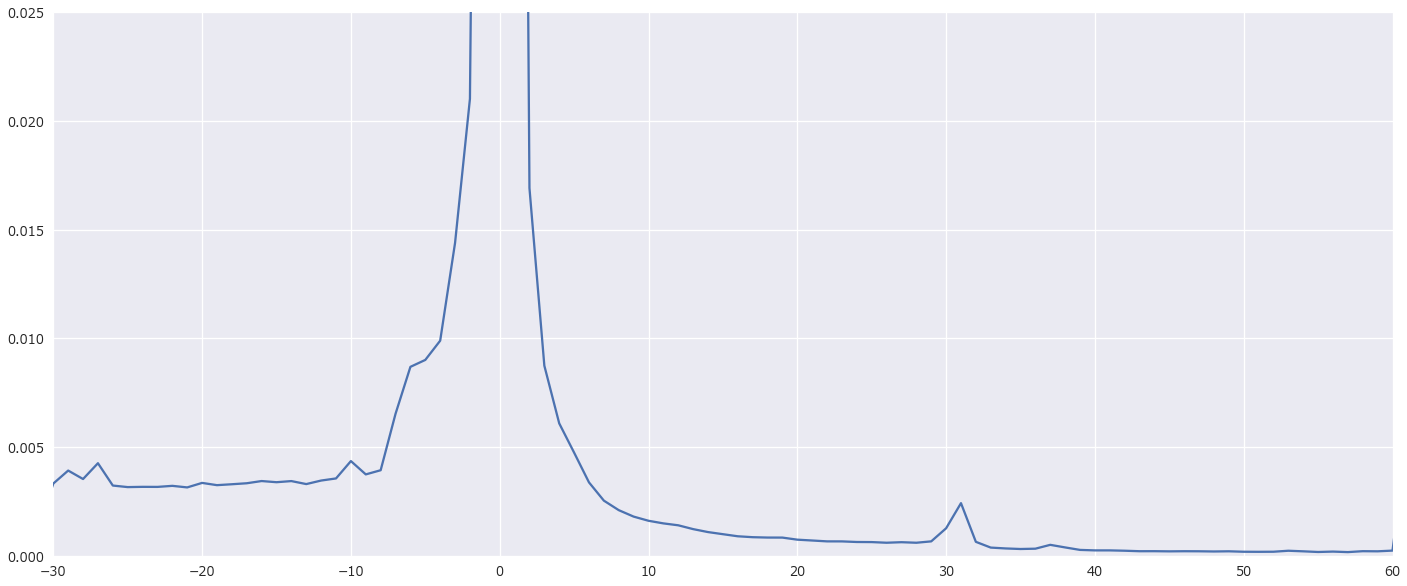

In [40]:
# 日付差のプロット
df_transactions.diff_.value_counts(normalize=True).sort_index().plot(figsize=(24, 10), xlim=(-30, 60), ylim=(0, 0.025))
plt.show()

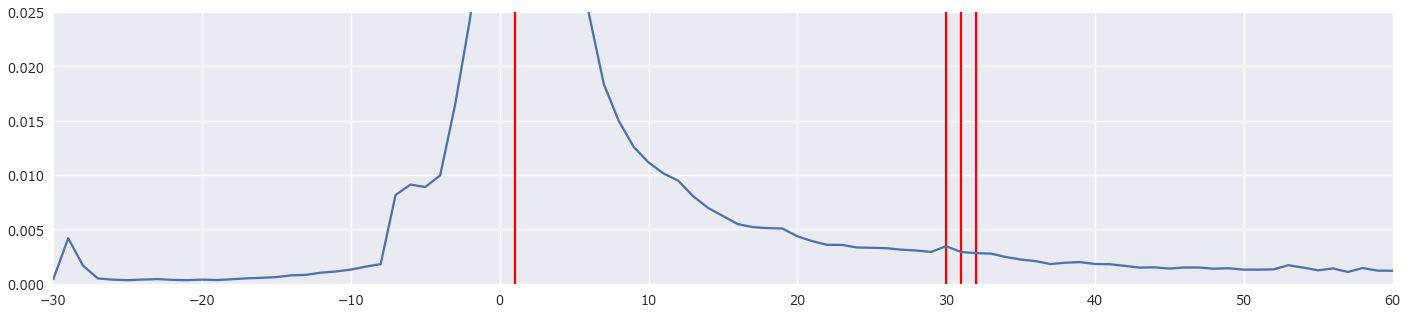

In [41]:
# 離反レコードと考えられるトランザクションに絞って日数差を可視化

df_temp1 = df_transactions[
    (df_transactions.is_auto_renew == '0') # 自動更新ではない
    | ((df_transactions.is_auto_renew == '1') & (df_transactions.is_cancel == '1')) # 自動更新をキャンセル
]
tmp = df_temp1.diff_.value_counts(normalize=True).sort_index()

# プロット
tmp.plot(figsize=(24, 5), xlim=(-30, 60), ylim=(0, 0.025))
plt.vlines([1, 30, 31, 32], 0, 0.6, linestyles='solid', colors='red')
plt.show()

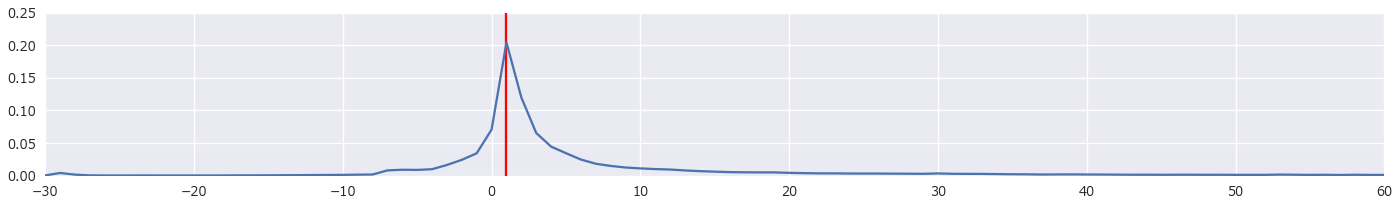

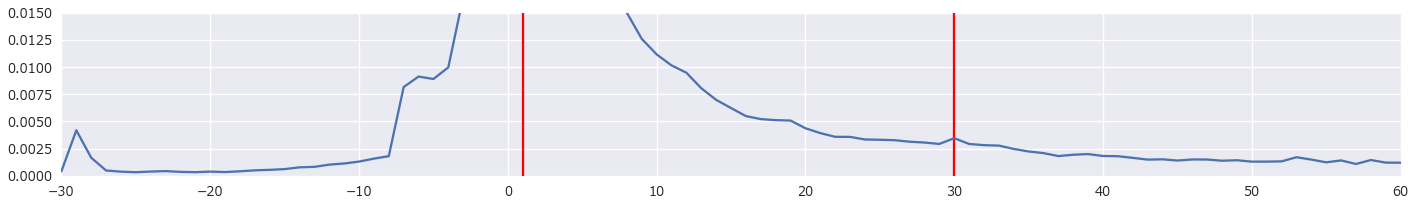

In [42]:
tmp.plot(figsize=(24, 3), xlim=(-30, 60), ylim=(0, 0.25))
plt.vlines([1], 0, 0.25, linestyles='solid', colors='red')
plt.show()

tmp.plot(figsize=(24, 3), xlim=(-30, 60), ylim=(0, 0.015))
plt.vlines([1, 30], 0, 0.25, linestyles='solid', colors='red')
plt.show()

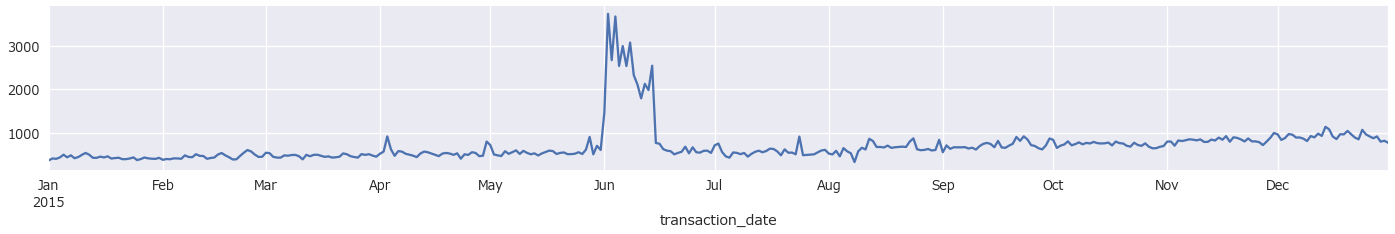

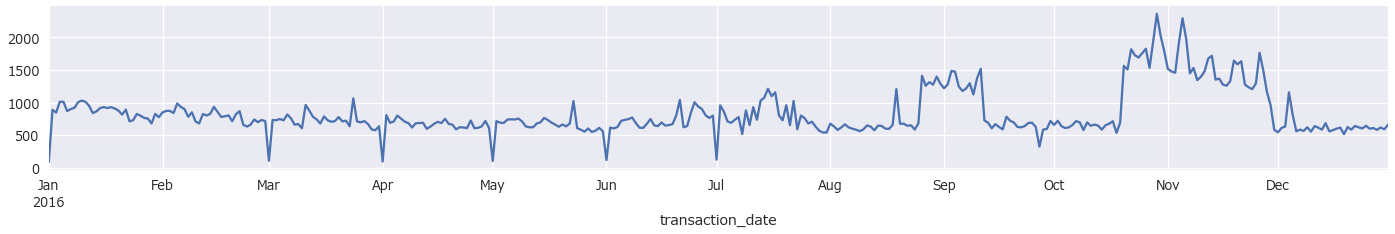

In [43]:
# 離反レコードと考えられるトランザクションに絞ってトランズアクション数を可視化
# 2015年
df_temp1.groupby('transaction_date').size()['2015'].plot(figsize=(24, 3))
plt.show()

# 2016年
df_temp1.groupby('transaction_date').size()['2016'].plot(figsize=(24, 3))
plt.show()

# 書き出し

In [48]:
fname_desc = os.path.join(output_dir, 'df_transactions_raw_describe.csv')
fname_desc_2 = os.path.join(output_dir, 'df_transactions_preprocessed_describe.csv')

desc_raw.to_csv(fname_desc)
desc_2.to_csv(fname_desc_2)

In [45]:
from sklearn.externals import joblib

In [47]:
%%time

# データが大きいのでpickle化
fname_transactions = os.path.join(data_dir, 'df_transactions_preprocessed.pickle')
joblib.dump(df_transactions, fname_transactions, protocol=3, compress=0)

CPU times: user 2.36 s, sys: 974 ms, total: 3.33 s
Wall time: 3.67 s
